This notebook deals with presentation of several quantities of the time series.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
%matplotlib inline

# My progs
from my_progs.vlbi.ts_func import get_ts

In [2]:
# souname = "2121+547"
souname = "1806-458"
coordts = get_ts(souname, calc_oft=True)

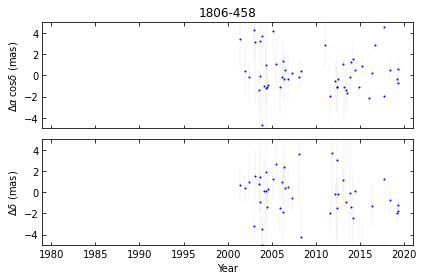

In [6]:
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, sharey=True)

ax0.errorbar(coordts["jyear"], coordts["dra"], yerr=coordts["ra_err"],
             fmt="b.", ecolor="grey", elinewidth=0.1, ms=2)
ax1.errorbar(coordts["jyear"], coordts["ddec"], yerr=coordts["dec_err"],
             fmt="b.", ecolor="grey", elinewidth=0.1, ms=2)

ax0.set_ylabel("$\Delta\\alpha\,\cos\delta$ ($\mathrm{mas}$)")
ax1.set_ylabel("$\Delta\delta$ ($\mathrm{mas}$)")
ax1.set_xlabel("Year")
ax1.set_ylim([-5, 5])
ax1.set_xlim([1979, 2021])

plt.subplots_adjust(hspace=0)
ax0.set_title(souname)
plt.tight_layout()
# plt.savefig("{:s}/{:s}.eps".format(plotdir, souname), hbox="tight")

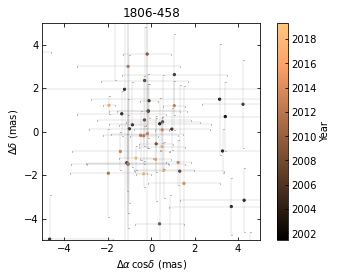

In [4]:
fig, ax = plt.subplots()
coordts.sort("jyear")
ax.errorbar(coordts["dra"], coordts["ddec"], xerr=coordts["ra_err"], yerr=coordts["dec_err"], 
           fmt="none", elinewidth=0.2, capsize=0.5, ecolor="grey", ms=0.1, mfc="lightgrey")
sc = ax.scatter(coordts["dra"], coordts["ddec"], c=coordts["jyear"], s=5,
                cmap="copper")

ax.set_ylabel("$\Delta\delta$ (mas)")
ax.set_xlabel("$\Delta\\alpha\,\cos\delta$ (mas)")

ax.axis("square")
lim = 5
ax.axis([-lim, lim, -lim, lim])
ax.set_title(souname)

plt.colorbar(sc, label="Year", fraction=0.1, ax=ax)
# plt.savefig("{:s}/{:s}-sc.eps".format(plotdir, souname), hbox="tight")

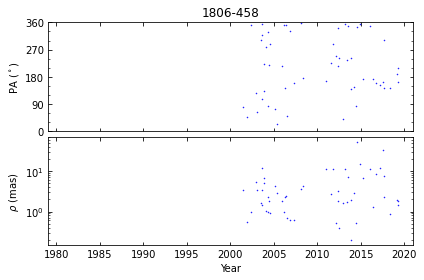

In [5]:
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True)

ax0.plot(coordts["jyear"], coordts["pa"], "b.", ms=1)
ax0.set_ylabel("PA ($^\circ$) ")
ax0.set_ylim([0, 360])
ax0.set_yticks(np.arange(0, 361, 90))
ax0.yaxis.set_minor_locator(MultipleLocator(30))
ax0.set_title(souname)

ax1.plot(coordts["jyear"], coordts["rho"], "b.", ms=1)
ax1.set_ylabel("$\\rho$ (mas)")
ax1.set_yscale("log")
# ax1.set_ylim([0.001, 10])
# ax1.set_yticks(np.arange(0, 10, 2))

ax1.set_xlabel("Year")
ax1.set_xlim([1979, 2021])

plt.tight_layout()
plt.subplots_adjust(hspace=0.05)
# plt.savefig("{:s}/{:s}-rp.eps".format(plotdir, souname), hbox="tight")